**Week3 Lab Experiment**

Python implementation of a backward propagation neural network for two-class classification using:

- A single hidden layer

- Tanh activation for hidden layer

- Sigmoid activation for output

- Cross-entropy loss function

- Manual implementation of forward and backward propagation

**1. The architecture for the Week3 Lab**
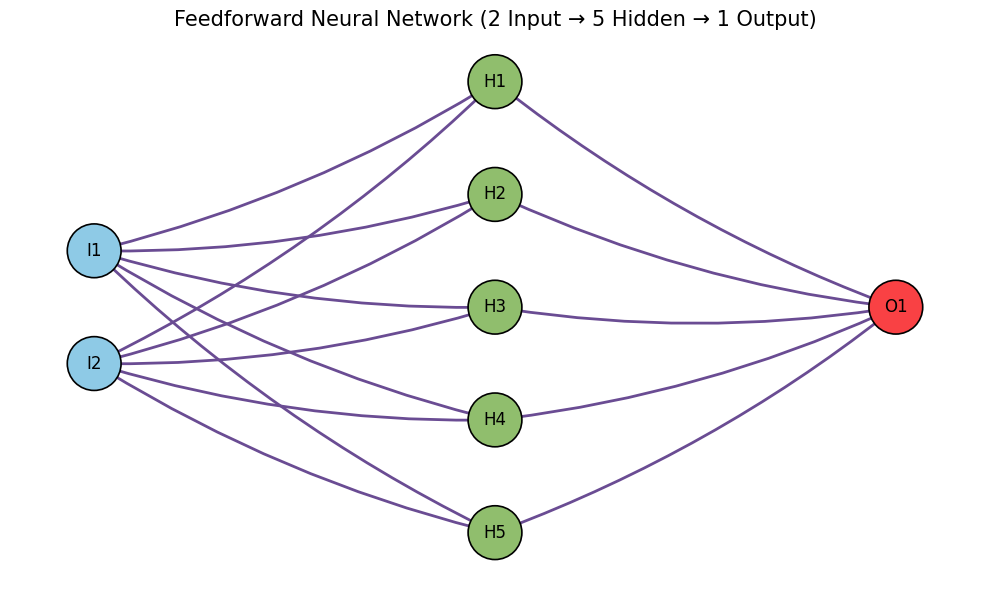


2. Tanh Activation Function

$$
    \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}

$$

3. Derivative of Tanh activation function

$$
    \frac{d}{dx}\tanh(x) = 1 - \tanh^2(x)

$$

4. Sigmaoid Activation Function

$$
    \sigma(x) = \frac{1}{1 + e^{-x}}

$$

5. Cross-Entropy Loss Function

$$
    \mathcal{L}_{\text{CE}} = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]

$$

**A. Defining the nccessary function**

In [1]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Tanh function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-12  # avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Binary classification labels
def accuracy(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)



**B. Defining The NN Architecture**

In [7]:
# Neural Network
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(1 / hidden_size)
        self.b2 = np.zeros((1, 1))
        self.loss_history = []

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = tanh(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y):
        m = y.shape[0]
        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * tanh_derivative(self.Z1)
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = cross_entropy_loss(y, y_pred)
            self.loss_history.append(loss)
            self.backward(X, y)
            if epoch % 100 == 0 or epoch == epochs - 1:
                acc = accuracy(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    def predict(self, X):
        return self.forward(X)


**C. Implementing the code**

In [8]:
# Create dummy 2D data
np.random.seed(42)
num_samples = 200
X = np.random.randn(num_samples, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)

# Train
nn = SimpleNeuralNetwork(input_size=2, hidden_size=5, learning_rate=0.1)
nn.train(X, y, epochs=1000)


Epoch 0, Loss: 0.6931, Accuracy: 0.5250
Epoch 100, Loss: 0.6691, Accuracy: 0.6150
Epoch 200, Loss: 0.6413, Accuracy: 0.6450
Epoch 300, Loss: 0.5993, Accuracy: 0.6850
Epoch 400, Loss: 0.5474, Accuracy: 0.7700
Epoch 500, Loss: 0.4947, Accuracy: 0.8150
Epoch 600, Loss: 0.4450, Accuracy: 0.8650
Epoch 700, Loss: 0.3898, Accuracy: 0.8800
Epoch 800, Loss: 0.3382, Accuracy: 0.9150
Epoch 900, Loss: 0.2990, Accuracy: 0.9200
Epoch 999, Loss: 0.2708, Accuracy: 0.9350


**D. Visualisation**

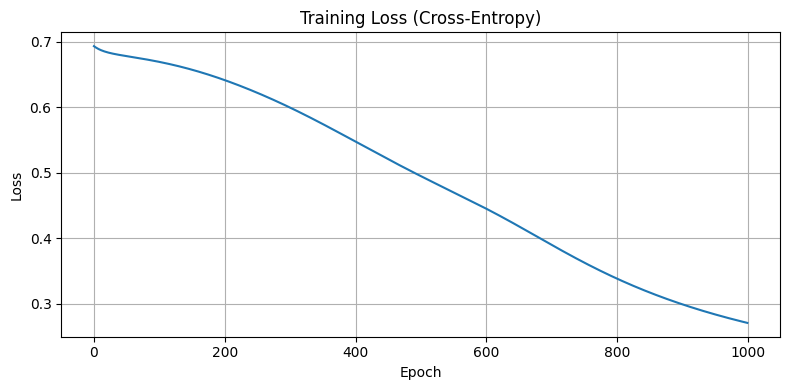

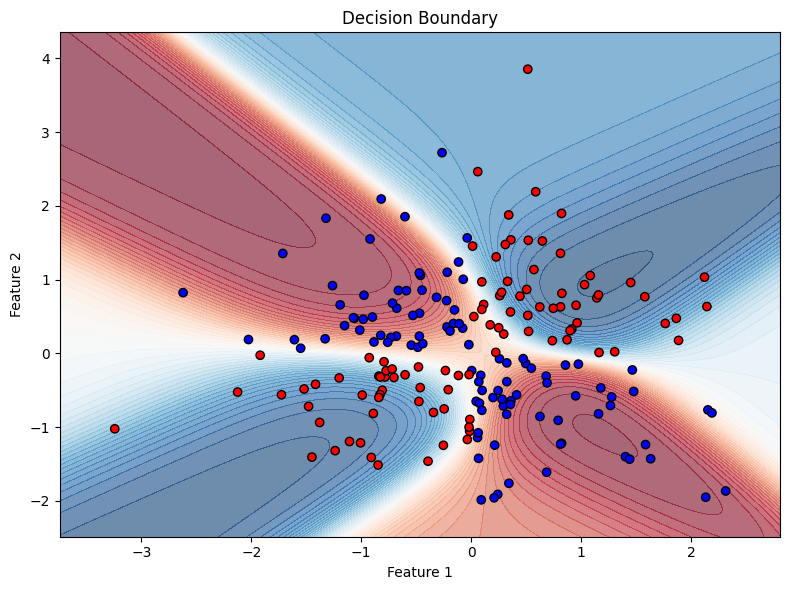

In [9]:
# Plot 1: Loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(nn.loss_history)
plt.title("Training Loss (Cross-Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot 2: Decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, levels=50, cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="bwr")
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

# Show decision boundary
plot_decision_boundary(nn, X, y)

Trying the our designed Neural Network with real datasets

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# [A] Load and preprocess real data
df = pd.read_csv("./datasets/week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# [B] Neural network as before...
# --- (insert your SimpleNeuralNetwork class and activation functions here) ---

# Example: custom network
nn = SimpleNeuralNetwork(input_size=X_train.shape[1], hidden_size=10, learning_rate=0.05)
nn.train(X_train, y_train, epochs=2000)

# Plot training loss
plt.figure(figsize=(8,4))
plt.plot(nn.loss_history)
plt.title("Training Loss on Breast Cancer Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate on test set
y_pred_test = nn.predict(X_test)
test_acc = accuracy(y_test, y_pred_test)
print(f"Test Accuracy: {test_acc:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: './datasets/week3_data.csv'